#Importing the Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import random


#Importing the training dataset from Drive.

In [2]:
dataset_train = r'/content/drive/MyDrive/Dataset/Train'

In [10]:
categories = ['Close eyes','Open eyes']
img_size = 60
data_1 =[]
for category in categories:
  folder_1 = os.path.join(dataset_train,category)
  label_1 = categories.index(category)
  for img in os.listdir(folder_1):
    img_path = os.path.join(folder_1,img)
    img_arr = cv2.imread(img_path)
    img_arr_1 = cv2.resize(img_arr,(img_size,img_size))
    data_1.append([img_arr_1,label_1])


#Importing the test dataset from Drive


In [11]:
dataset_test = r'/content/drive/MyDrive/Dataset/Test'
data_2 = []
for category in categories:
  folder_2 = os.path.join(dataset_test,category)
  label_2 = categories.index(category)
  for img_1 in os.listdir(folder_2):
    img_path_1 = os.path.join(folder_2,img_1)
    img_arr2 = cv2.imread(img_path_1)
    img_arr_2 = cv2.resize(img_arr2,(img_size,img_size))
    data_2.append([img_arr_2,label_2])

##Working on train data

In [ ]:
len(data_1)

17192

In [ ]:
#Shuffling the images
random.shuffle(data_1)

In [ ]:
print(data_1[0])

[array([[[46, 46, 46],
        [46, 46, 46],
        [47, 47, 47],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [74, 74, 74]],

       [[45, 45, 45],
        [45, 45, 45],
        [46, 46, 46],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [75, 75, 75]],

       [[46, 46, 46],
        [45, 45, 45],
        [46, 46, 46],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       ...,

       [[57, 57, 57],
        [53, 53, 53],
        [51, 51, 51],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [70, 70, 70]],

       [[60, 60, 60],
        [55, 55, 55],
        [52, 52, 52],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [72, 72, 72]],

       [[61, 61, 61],
        [57, 57, 57],
        [53, 53, 53],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [72, 72, 72]]], dtype=uint8), 0]


In [ ]:
#Extracting the features and labels from training data
X = []
Y = []
for features,labels in data_1:
  X.append(features)
  Y.append(labels)

In [ ]:
#Converting the data into numpy array
import numpy as np
X = np.array(X)
Y = np.array(Y)

In [ ]:
len(X)

17192

In [ ]:
len(Y)

17192

##Working on test data

In [ ]:
random.shuffle(data_2)

In [ ]:
len(data_2)

2497

In [25]:
x=[]
y=[]

for features,labels in data_2:
  x.append(features)
  y.append(labels)


In [27]:
#converting test data into numpy array
import numpy as np
x = np.array(x)
y = np.array(y)

In [ ]:
#Rescaling the train and test data
X = X/255
x = x/255

###Plotting the images

In [ ]:
#image view
from matplotlib import pyplot as plt
def plot_images(x1,y1,index):
  plt.figure(figsize=(8,8))
  plt.imshow(x1[index])
  plt.xlabel(categories[y1[index]])

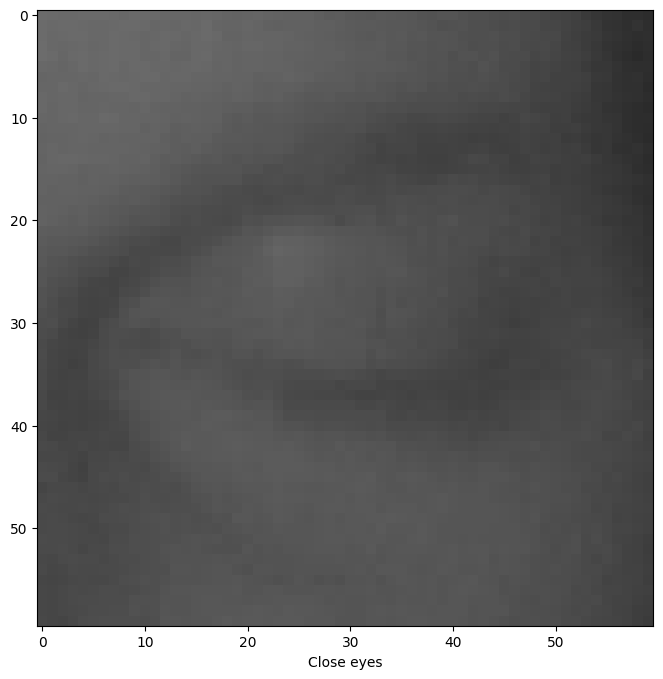

In [ ]:
plot_images(X,Y,1)

In [ ]:
#reshaping the target
Y_reshape = Y.reshape(len(Y),1*1)
y_reshape = y.reshape(len(y),1*1)

In [ ]:
Y_reshape[:5]

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
#Converting the target into categorical values
Y_categorical = keras.utils.to_categorical(Y_reshape,num_classes=2,dtype='float32')
y_categorical = keras.utils.to_categorical(y_reshape,num_classes=2,dtype='float32')

In [ ]:
Y_categorical[:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

#Building the CNN model
####This is the first attempt to train the model, after training we check the accuracy of the model. If we did'nt get good accuracy then we proceed to other method.

In [ ]:

model = keras.Sequential([
    keras.layers.Conv2D(filters=486,kernel_size=(3,3),input_shape=(60,60,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),



    keras.layers.Flatten(),
    keras.layers.Dense(586,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2,activation='softmax')

])

###Visualising the CNN layers


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 486)       13608     
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 29, 486)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       1120000   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 128)         0

In [ ]:
!pip install visualkeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 2.4 MB/s eta 0:00:00


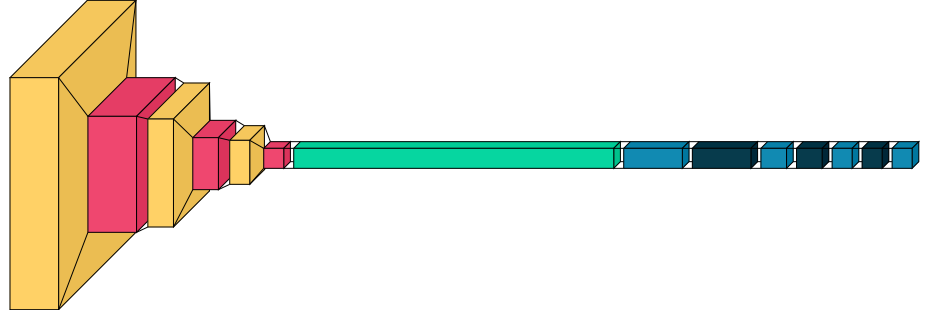

In [ ]:
import visualkeras
visualkeras.layered_view(model)

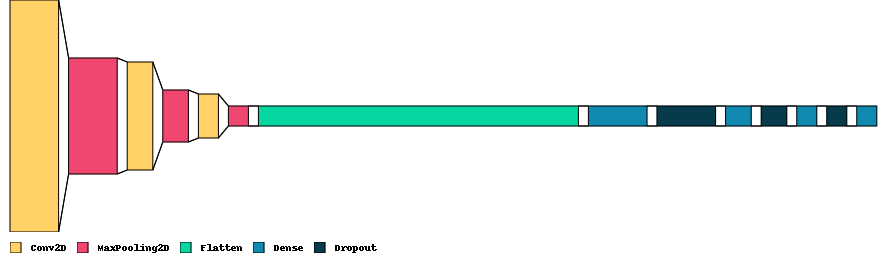

In [ ]:
#plotting the layers with name
visualkeras.layered_view(model,legend=True,draw_volume=False)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
history = model.fit(X,Y_categorical,validation_data=(x,y_categorical),batch_size=5,epochs=10)

Epoch 1/10
3439/3439 [==============================] - 42s 11ms/step - loss: 0.0670 - accuracy: 0.9854 - val_loss: 0.7446 - val_accuracy: 0.8194
Epoch 2/10
3439/3439 [==============================] - 40s 12ms/step - loss: 0.0431 - accuracy: 0.9859 - val_loss: 0.4538 - val_accuracy: 0.8915
Epoch 3/10
3439/3439 [==============================] - 39s 11ms/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 0.9094 - val_accuracy: 0.8710
Epoch 4/10
3439/3439 [==============================] - 39s 11ms/step - loss: 0.0387 - accuracy: 0.9888 - val_loss: 2.5048 - val_accuracy: 0.7573
Epoch 5/10
3439/3439 [==============================] - 45s 13ms/step - loss: 0.0465 - accuracy: 0.9882 - val_loss: 0.3265 - val_accuracy: 0.9211
Epoch 6/10
3439/3439 [==============================] - 39s 11ms/step - loss: 0.0303 - accuracy: 0.9899 - val_loss: 1.0099 - val_accuracy: 0.8338
Epoch 7/10
3439/3439 [==============================] - 38s 11ms/step - loss: 0.0315 - accuracy: 0.9911 - val_loss: 1.5206 -

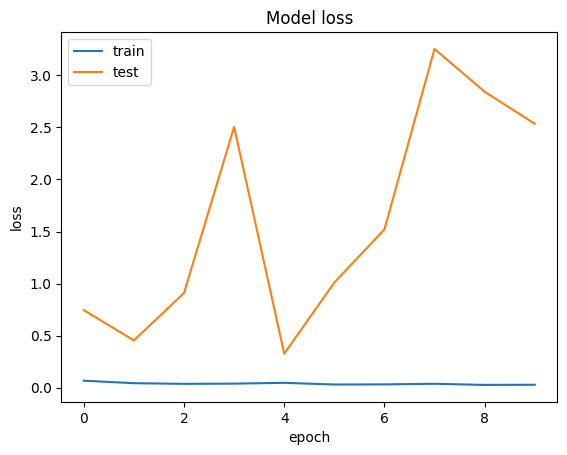

In [ ]:
#plotting the loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

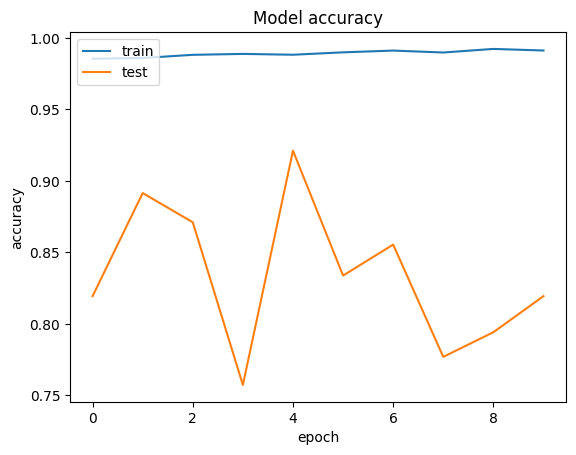

In [ ]:
#plotting the accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

##The CNN network did'nt give good results it is also overfitting, so we can go for other technique like, Data argumentation ,transfer learning

#Data Argumentation

In [12]:
#Image datagenerator
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_generator=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.2],
    rotation_range=30,
)

In [16]:
test_generator=ImageDataGenerator(
    rescale=1./255,
)

In [17]:
train_datagen = train_generator.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Train',
    target_size=(60,60),
    batch_size=5,
    class_mode='categorical'
)

Found 17192 images belonging to 2 classes.


In [18]:
test_datagen = test_generator.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Test',
    target_size=(60,60),
    batch_size=5,
    class_mode='categorical'
)

Found 2497 images belonging to 2 classes.


In [33]:
#model building
model1 = keras.Sequential([
    keras.layers.Conv2D(filters=512,kernel_size=(3,3),input_shape=(60,60,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),



    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(2,activation='softmax')

])

###Visualising the layers


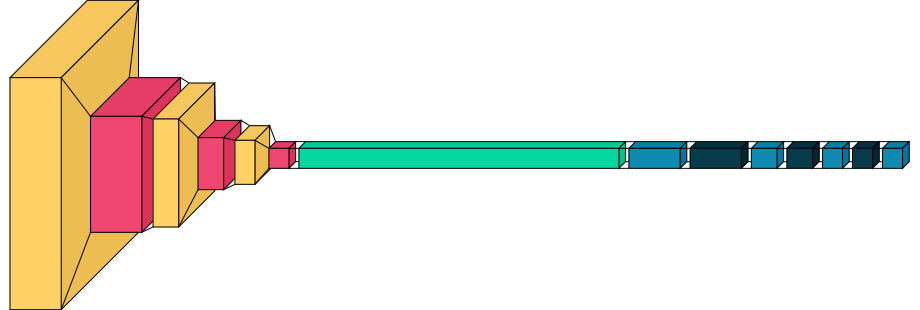

In [ ]:
import visualkeras
visualkeras.layered_view(model1)

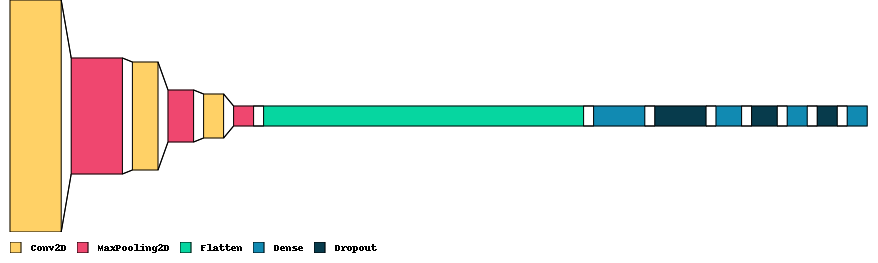

In [ ]:
#plotting the layers with name
visualkeras.layered_view(model1,legend=True,draw_volume=False)

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [35]:
checkpoint_callback = ModelCheckpoint(filepath='model_checkpoint.h5',save_best_only=True)


In [36]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
history = model1.fit_generator(train_datagen,validation_data=test_datagen,epochs=20,callbacks=[checkpoint_callback])

Epoch 1/20


<ipython-input-36-8ec80478663d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(train_datagen,validation_data=test_datagen,epochs=20,callbacks=[checkpoint_callback])


3439/3439 [==============================] - 87s 25ms/step - loss: 0.3062 - accuracy: 0.8631 - val_loss: 0.3868 - val_accuracy: 0.8763
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3439/3439 [==============================] - 81s 24ms/step - loss: 0.1893 - accuracy: 0.9312 - val_loss: 0.5572 - val_accuracy: 0.8502
Epoch 3/20
3439/3439 [==============================] - 86s 25ms/step - loss: 0.1724 - accuracy: 0.9386 - val_loss: 0.5381 - val_accuracy: 0.8378
Epoch 4/20
3439/3439 [==============================] - 81s 24ms/step - loss: 0.1711 - accuracy: 0.9414 - val_loss: 0.1215 - val_accuracy: 0.9511
Epoch 5/20
3439/3439 [==============================] - 81s 23ms/step - loss: 0.1816 - accuracy: 0.9432 - val_loss: 0.2684 - val_accuracy: 0.9195
Epoch 6/20
3439/3439 [==============================] - 81s 24ms/step - loss: 0.1487 - accuracy: 0.9472 - val_loss: 0.1121 - val_accuracy: 0.9700
Epoch 7/20
3439/3439 [==============================] - 112s 33ms/step - loss: 0.1438 - accuracy: 0.9511 - val_loss: 0.3320 - val_accuracy: 0.9151
Epoch 8/20
3439/3439 [==============================] - 81s 23ms/step - loss: 0.1440 - accuracy: 0.9515 - val_loss: 0.1587 - val_accur

In [39]:
from matplotlib import pyplot as plt

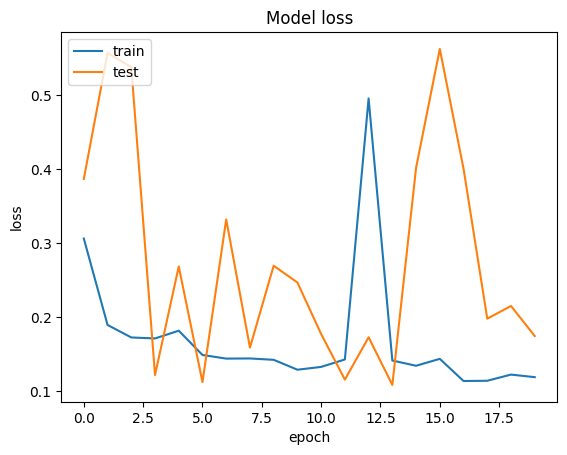

In [40]:
#plotting the loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

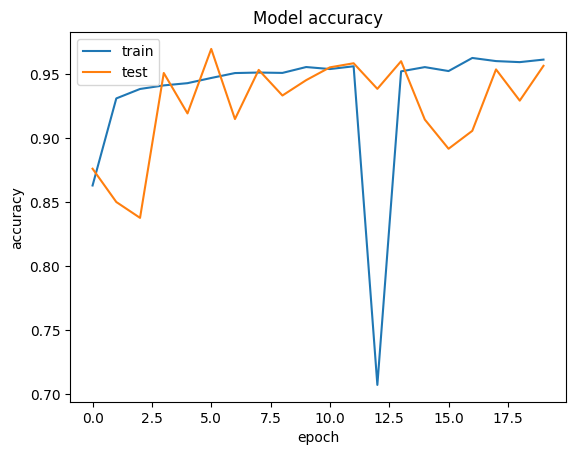

In [41]:
#plotting the accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

#Transfer Learning


##VGG16 model

In [ ]:
#importing the VGG16 model
from keras.applications.vgg16 import VGG16


In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(60,60,3)
)
#only importing the CNN layers not the ANN.

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 60, 60, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 60, 60, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 30, 30, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 30, 30, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 30, 30, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 15, 15, 128)       0     

In [ ]:
#Building the dense layer and adding the conv_base
model2 = keras.Sequential([
    conv_base,
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2,activation='softmax'),

])

In [ ]:
conv_base.trainable=False
#not train the CNN layers only train the Dense/Ann layers

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
history2 = model2.fit_generator(train_datagen,validation_data=test_datagen,epochs=6)

Epoch 1/6


<ipython-input-45-d13037fbb397>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(train_datagen,validation_data=test_datagen,epochs=6)


3439/3439 [==============================] - 84s 24ms/step - loss: 0.2943 - accuracy: 0.8778 - val_loss: 0.9444 - val_accuracy: 0.5947
Epoch 2/6
3439/3439 [==============================] - 79s 23ms/step - loss: 0.2255 - accuracy: 0.9133 - val_loss: 1.8826 - val_accuracy: 0.5114
Epoch 3/6
3439/3439 [==============================] - 82s 24ms/step - loss: 0.2098 - accuracy: 0.9223 - val_loss: 2.1804 - val_accuracy: 0.5134
Epoch 4/6
3439/3439 [==============================] - 81s 24ms/step - loss: 0.2000 - accuracy: 0.9268 - val_loss: 1.0499 - val_accuracy: 0.6444
Epoch 5/6
3439/3439 [==============================] - 80s 23ms/step - loss: 0.1961 - accuracy: 0.9289 - val_loss: 1.4838 - val_accuracy: 0.5571
Epoch 6/6
3439/3439 [==============================] - 80s 23ms/step - loss: 0.1847 - accuracy: 0.9329 - val_loss: 1.8158 - val_accuracy: 0.5763


##VGG19 model

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
conv_base1 = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(60,60,3)
)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
conv_base1.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 60, 60, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 60, 60, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 30, 30, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 30, 30, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 30, 30, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 15, 15, 128)       0     

In [ ]:
model3 = keras.Sequential([
    conv_base1,
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2,activation='softmax'),

])

In [ ]:
conv_base1.trainable=False

In [ ]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
history3 = model3.fit_generator(train_datagen,validation_data=test_datagen,epochs=6)

Epoch 1/6


<ipython-input-52-d27fa91972ba>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model3.fit_generator(train_datagen,validation_data=test_datagen,epochs=6)


3439/3439 [==============================] - 84s 24ms/step - loss: 0.3320 - accuracy: 0.8591 - val_loss: 1.5052 - val_accuracy: 0.5066
Epoch 2/6
3439/3439 [==============================] - 85s 25ms/step - loss: 0.2668 - accuracy: 0.8915 - val_loss: 1.3612 - val_accuracy: 0.5495
Epoch 3/6
3439/3439 [==============================] - 85s 25ms/step - loss: 0.2477 - accuracy: 0.9027 - val_loss: 1.8229 - val_accuracy: 0.5074
Epoch 4/6
3439/3439 [==============================] - 80s 23ms/step - loss: 0.2367 - accuracy: 0.9068 - val_loss: 1.4099 - val_accuracy: 0.5178
Epoch 5/6
3439/3439 [==============================] - 85s 25ms/step - loss: 0.2228 - accuracy: 0.9117 - val_loss: 0.8881 - val_accuracy: 0.5911
Epoch 6/6
3439/3439 [==============================] - 81s 23ms/step - loss: 0.2209 - accuracy: 0.9163 - val_loss: 1.5387 - val_accuracy: 0.5234


#ResNet50


In [ ]:
from keras.applications.resnet50 import ResNet50

In [ ]:
conv_base2 = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(60,60,3)
)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
conv_base2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 60, 60, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 66, 66, 3)            0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 30, 30, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 30, 30, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model4 = keras.Sequential([
    conv_base2,
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2,activation='softmax'),

])

In [ ]:
conv_base2.trainable=False

In [ ]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
history4 = model4.fit_generator(train_datagen,validation_data=test_datagen,epochs=5)

<ipython-input-58-d3c8447546d6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = model4.fit_generator(train_datagen,validation_data=test_datagen,epochs=5)


Epoch 1/5
3439/3439 [==============================] - 101s 27ms/step - loss: 0.6994 - accuracy: 0.5144 - val_loss: 0.6933 - val_accuracy: 0.5022
Epoch 2/5
3439/3439 [==============================] - 96s 28ms/step - loss: 0.6935 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5022
Epoch 3/5
3439/3439 [==============================] - 93s 27ms/step - loss: 0.6933 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 4/5
3439/3439 [==============================] - 98s 28ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6934 - val_accuracy: 0.5022
Epoch 5/5
3439/3439 [==============================] - 92s 27ms/step - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6932 - val_accuracy: 0.4978


##We uses the different techniques and best results we get from Data Argumentation, so we can procced with data argumentation.

#Plotting the confusion matrix


In [42]:
y_pred = model1.predict(x).round(2)

79/79 [==============================] - 1s 10ms/step


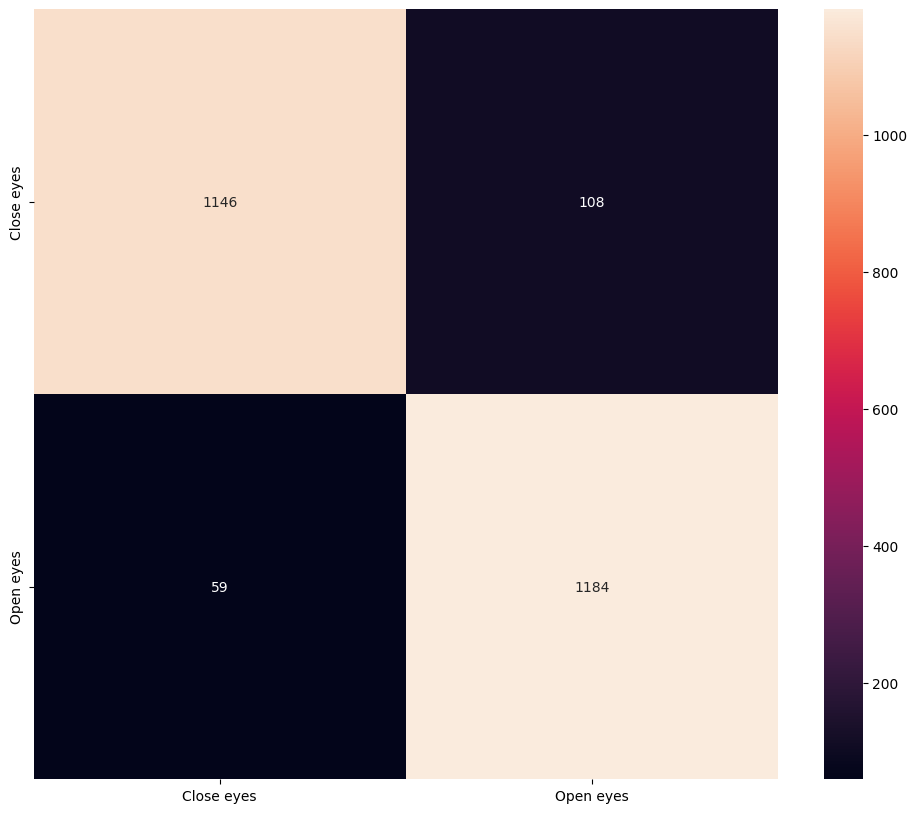

In [43]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(12,10))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y,y_pred_labels)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=categories,yticklabels=categories)
plt.show()

#Saving the model in h5 file


In [37]:
#Here we only saving model1 which is data argumentated model.
model1.save('/content/drive/MyDrive/saved model/model1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Precision recall and f1 score


In [44]:
from sklearn.metrics import classification_report
cr = classification_report(y,y_pred_labels,target_names=categories)
print(cr)

              precision    recall  f1-score   support

  Close eyes       0.95      0.91      0.93      1254
   Open eyes       0.92      0.95      0.93      1243

    accuracy                           0.93      2497
   macro avg       0.93      0.93      0.93      2497
weighted avg       0.93      0.93      0.93      2497



In [38]:
input_1 = input('Enter the path of images:-')
inpt_path = cv2.imread(input_1)
input_resize = cv2.resize(inpt_path,(60,60))
input_reshape=input_resize.reshape(1,60,60,3)
print(categories[np.argmax(model1.predict(input_reshape))])


Enter the path of images:-/content/drive/MyDrive/360_F_332016692_23t2R16cywAOPjFTk6ldvxeyiEhNvOqn.jpg
1/1 [==============================] - 0s 83ms/step
Close eyes
